In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos
import sw_and_int_one_sess as sios

In [3]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_disinhibition'
figdir = misc.get_or_create_subdir(figdir)

In [4]:
consec_trial_fr_diff_all = {}
sustained_all = {}
transient_all={}
for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    sw_and_int_res=sios.main(data_dir_full,force_reload=False,load_only=True)
    consec_trial_fr_diff=sw_and_int_res['consec_trial_fr_diff_all']
    sustained=sw_and_int_res['sustained']
    transient =sw_and_int_res['transient']
    consec_trial_fr_diff_all[ani,sess] = consec_trial_fr_diff
    sustained_all[ani,sess] = sustained
    transient_all[ani,sess] = transient
    
consec_trial_fr_diff_all = pd.concat(consec_trial_fr_diff_all,axis=0)
sustained_all = pd.concat(sustained_all,axis=0)
transient_all = pd.concat(transient_all,axis=0)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_2

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210314/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201019/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200727/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/sw_and_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200723/py

In [35]:
kk=3
sub=sustained_all.loc[(slice(None),slice(None),slice(None),kk),:]
sig_ma=(sub['ks_p']<0.05)&(sub['ks_sign']==-1)
sig_ma.groupby(level=2).mean()

0.0    0.195652
0.1    0.260870
0.2    0.304348
0.3    0.217391
0.4    0.108696
0.5    0.130435
dtype: float64

In [49]:
gpb=sustained_all.groupby(level=(0,1,2),sort=False)
satisfy_d = {}
for k,val in gpb:
    satisfy = (val.loc[k].loc[1,'ks_sign'] == 1) & (val.loc[k].loc[2:4,'ks_sign'] == -1).any()
    satisfy_d[k] = satisfy
satisfy_d = pd.Series(satisfy_d)

In [53]:
satisfy_d.groupby(level=2).mean()

0.0    0.782609
0.1    0.717391
0.2    0.652174
0.3    0.608696
0.4    0.521739
0.5    0.347826
dtype: float64

In [55]:
gpb=sustained_all.groupby(level=(0,1,2),sort=False)
satisfy_d = {}
for k,val in gpb:
    satisfy = (val.loc[k].loc[1,'w_stat'] < 0) & (val.loc[k].loc[2:4,'w_stat'] > 0).any()
    satisfy_d[k] = satisfy
satisfy_d = pd.Series(satisfy_d)
satisfy_d.groupby(level=2).mean()

0.0    0.782609
0.1    0.673913
0.2    0.630435
0.3    0.586957
0.4    0.500000
0.5    0.282609
dtype: float64

# per session U-stat

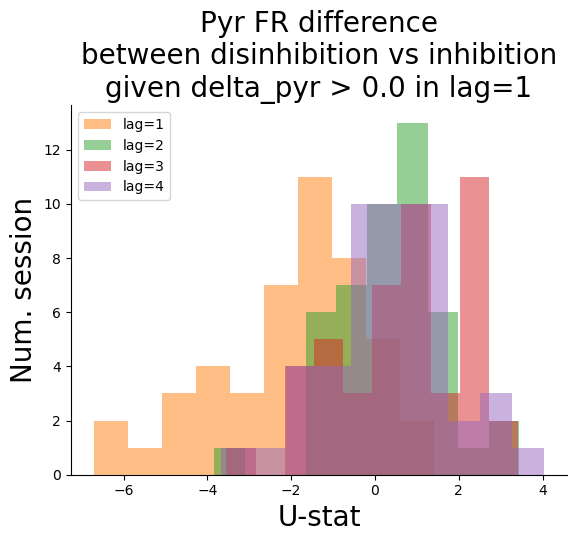

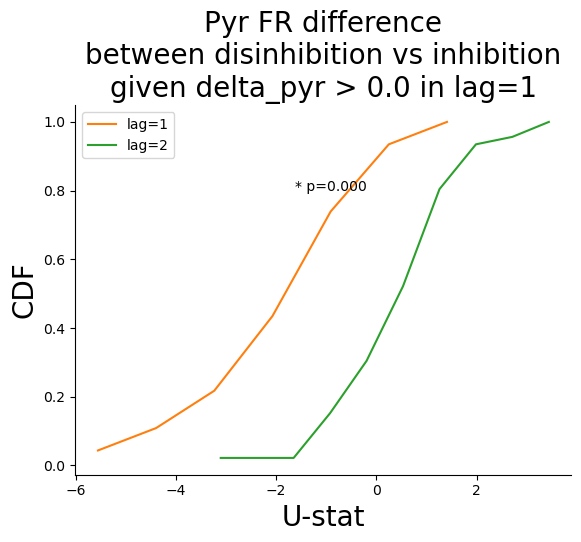

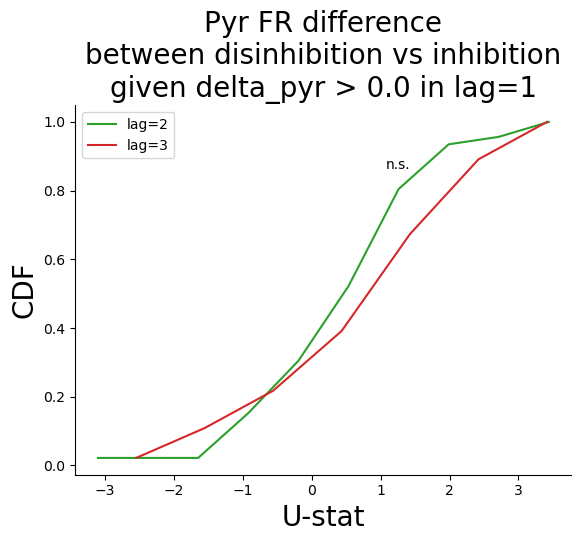

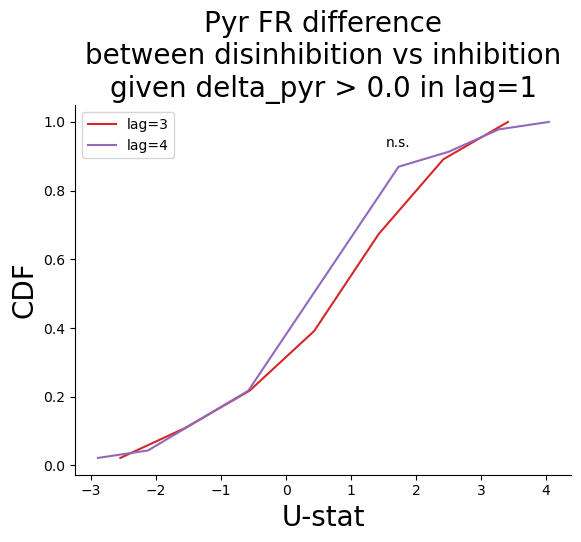

In [6]:
reload(ph)

# pth=0.2
pth=0.
label_l = {l:f'lag={l}' for l in range(1,5)}
title=f'Pyr FR difference\nbetween disinhibition vs inhibition\ngiven delta_pyr > {pth} in lag=1'
fig,ax=plt.subplots()
for kk in range(1,5):
    ax=sustained_all.loc[(slice(None),slice(None),pth,kk),'w_stat'].hist(alpha=0.5,grid=False,color=f'C{kk}',label=label_l[kk])
    sns.despine()
    ax.legend()
    ax.set(xlabel='U-stat',ylabel='Num. session')
    ax.set_title(title)
savefn=os.path.join(figdir,f'u_stat_across_sessions_pyr_up_thresh_{pth:.0e}.svg')
fig.savefig(savefn,bbox_inches='tight')
savefn=os.path.join(figdir,f'u_stat_across_sessions_pyr_up_thresh_{pth:.0e}.png')
fig.savefig(savefn,bbox_inches='tight')


for kk in range(1,4):
    xx=sustained_all.loc[(slice(None),slice(None),pth,kk),'w_stat']
    yy=sustained_all.loc[(slice(None),slice(None),pth,kk+1),'w_stat']
    fig,ax=ph.plot_cdf_and_ks_test(xx,yy,c_l=[f'C{kk}',f'C{kk+1}'],label1=label_l[kk],label2=label_l[kk+1],
                                   xlabel='U-stat',title=title
                                  )
    savefn=os.path.join(figdir,f'ks_for_ustat_lag_{kk}_{kk+1}_pyr_up_thresh_{pth:.0e}.svg')
    fig.savefig(savefn,bbox_inches='tight')
    savefn=os.path.join(figdir,f'ks_for_ustat_lag_{kk}_{kk+1}_pyr_up_thresh_{pth:.0e}.png')
    fig.savefig(savefn,bbox_inches='tight')



# significant fractions

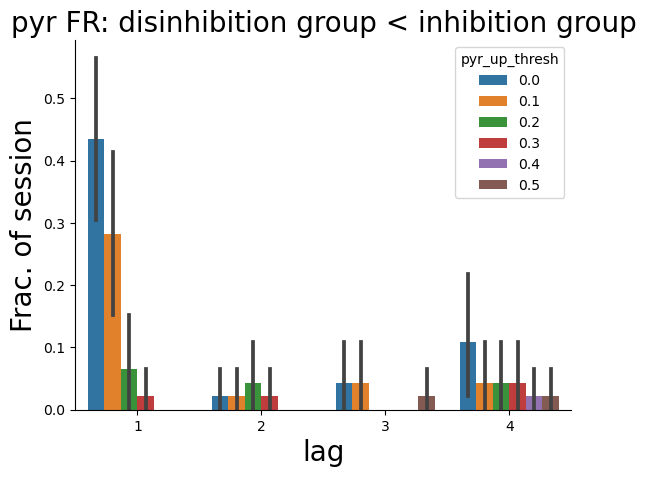

In [176]:
sust_unstack=sustained_all.unstack()
filtered=(sust_unstack['w_stat'] < 0) & (sust_unstack['w_p'] < 0.05)
filtered=filtered.reset_index(level=2).rename({'level_2':'pyr_up_thresh'},axis=1)
filtered=filtered.melt(value_vars=[1,2,3,4],var_name='lag',id_vars=['pyr_up_thresh'],value_name='issig')
fig,ax=plt.subplots()
ax=sns.barplot(data=filtered,x='lag',y='issig',hue='pyr_up_thresh',ax=ax)
ax.set_title('pyr FR: disinhibition group < inhibition group')
ax.set_ylabel('Frac. of session')
sns.despine()

In [177]:
fig.savefig(os.path.join(figdir,f'frac_sig_session_pyr_fr_disinhibition_group_less_inhibition_grouper.svg'),bbox_inches='tight')
fig.savefig(os.path.join(figdir,f'frac_sig_session_pyr_fr_disinhibition_group_less_inhibition_grouper.png'),bbox_inches='tight')




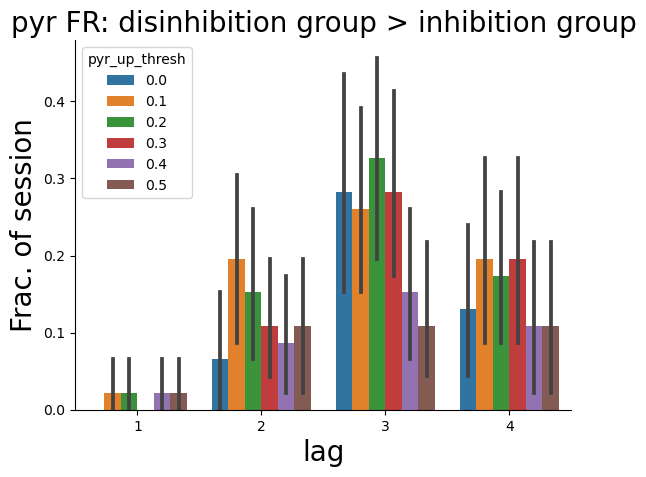

In [178]:
sust_unstack=sustained_all.unstack()
filtered=(sust_unstack['w_stat'] > 0) & (sust_unstack['w_p'] < 0.05)
filtered=filtered.reset_index(level=2).rename({'level_2':'pyr_up_thresh'},axis=1)
filtered=filtered.melt(value_vars=[1,2,3,4],var_name='lag',id_vars=['pyr_up_thresh'],value_name='issig')
fig,ax=plt.subplots()
ax=sns.barplot(data=filtered,x='lag',y='issig',hue='pyr_up_thresh',ax=ax)
ax.set_title('pyr FR: disinhibition group > inhibition group')
ax.set_ylabel('Frac. of session')
sns.despine()

In [179]:
fig.savefig(os.path.join(figdir,f'frac_sig_session_pyr_fr_disinhibition_group_greater_inhibition_grouper.svg'),bbox_inches='tight')
fig.savefig(os.path.join(figdir,f'frac_sig_session_pyr_fr_disinhibition_group_greater_inhibition_grouper.png'),bbox_inches='tight')



In [103]:
gpb=sustained_all.groupby(level=(0,1,2),sort=False)
satisfy_d = {}
for k,val in gpb:
    satisfy = (val.loc[k].loc[1,'ks_sign'] == 1) & (val.loc[k].loc[2:4,'ks_sign'] == -1).any()
    satisfy_d[k] = satisfy
satisfy_d = pd.Series(satisfy_d)

In [104]:
satisfy_d

e13_26m1  e13_26m1_210913  0.0     True
                           0.1     True
                           0.2     True
                           0.3     True
                           0.4     True
                                  ...  
e14_2m3   e14_2m3_201118   0.1    False
                           0.2     True
                           0.3     True
                           0.4    False
                           0.5    False
Length: 276, dtype: bool

# per session p-val

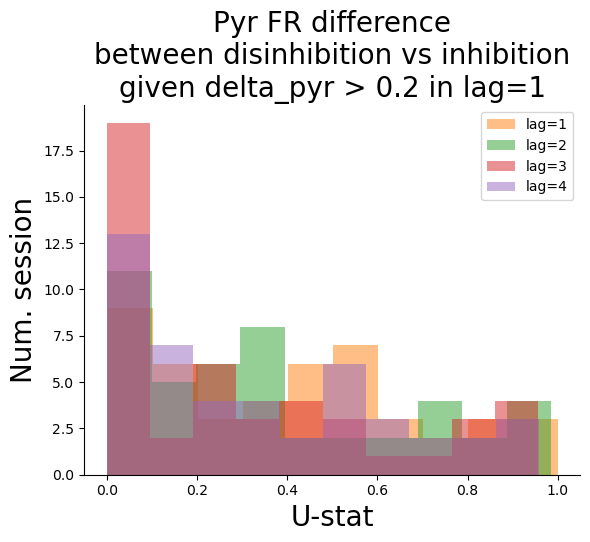

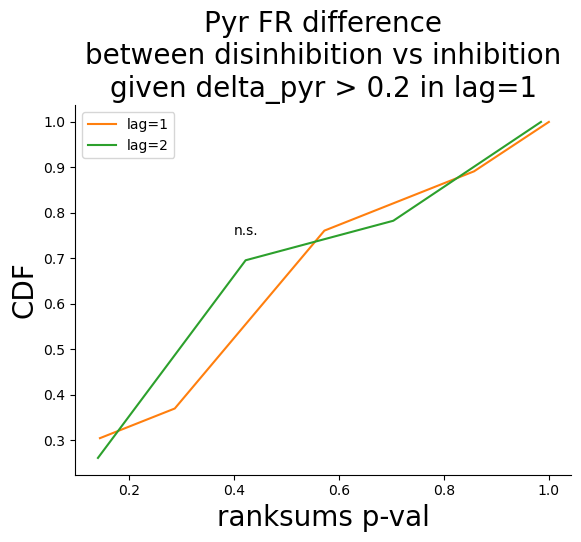

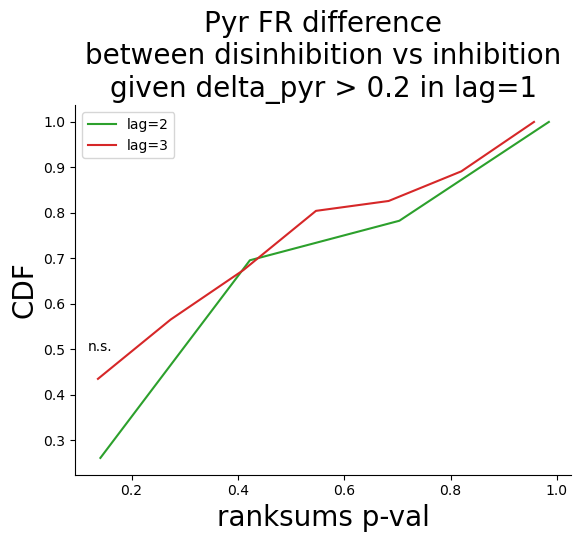

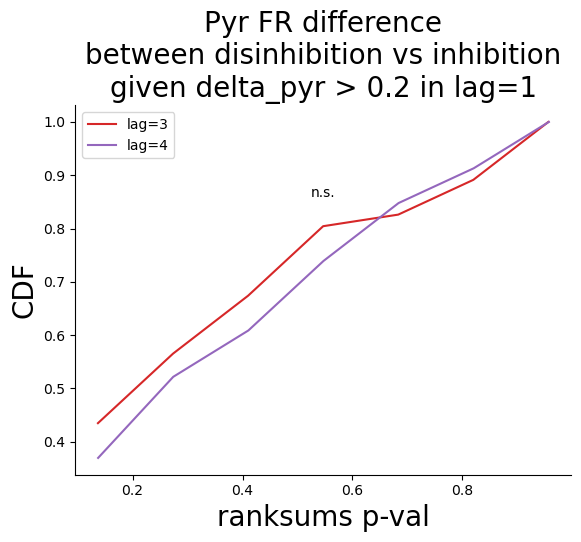

In [102]:
reload(ph)

pth=0.2
label_l = {l:f'lag={l}' for l in range(1,5)}
title=f'Pyr FR difference\nbetween disinhibition vs inhibition\ngiven delta_pyr > {pth} in lag=1'
key = 'w_p'
for kk in range(1,5):
    ax=sustained_all.loc[(slice(None),slice(None),pth,kk),key].hist(alpha=0.5,grid=False,color=f'C{kk}',label=label_l[kk])
    sns.despine()
    ax.legend()
    ax.set(xlabel='U-stat',ylabel='Num. session')
    ax.set_title(title)

for kk in range(1,4):
    xx=sustained_all.loc[(slice(None),slice(None),pth,kk),key]
    yy=sustained_all.loc[(slice(None),slice(None),pth,kk+1),key]
    fig,ax=ph.plot_cdf_and_ks_test(xx,yy,c_l=[f'C{kk}',f'C{kk+1}'],label1=label_l[kk],label2=label_l[kk+1],
                                   xlabel='ranksums p-val',title=title
                                  )


# concatenate fields&trials across sessions

In [162]:
f'cdf_change_in_pyr_lag_{kk}_disinhibition_vs_not_pyr_up_thresh_{pyr_up_threh:.0e}.svg'

'cdf_change_in_pyr_lag_3_disinhibition_vs_not_pyr_up_thresh_2e-01.svg'

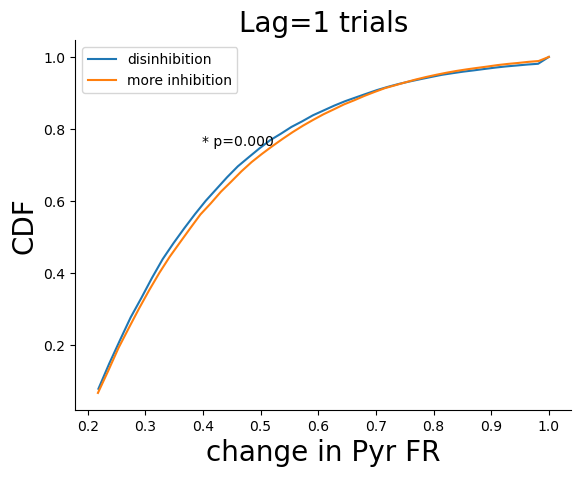

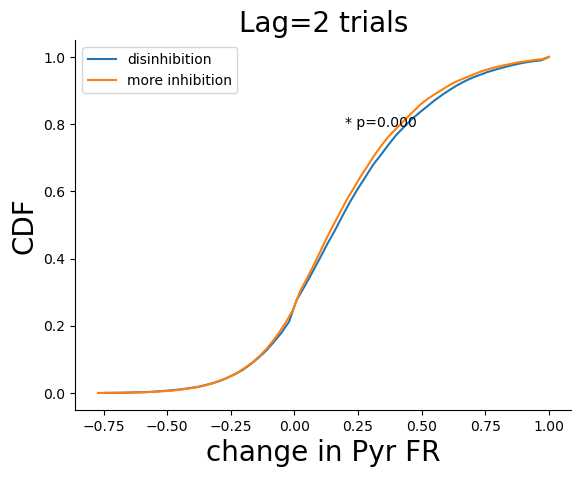

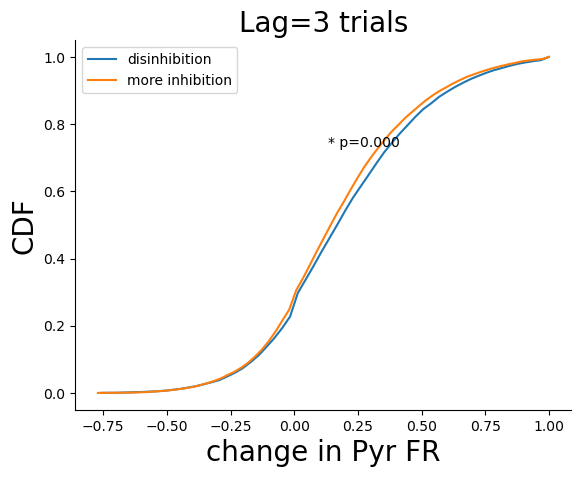

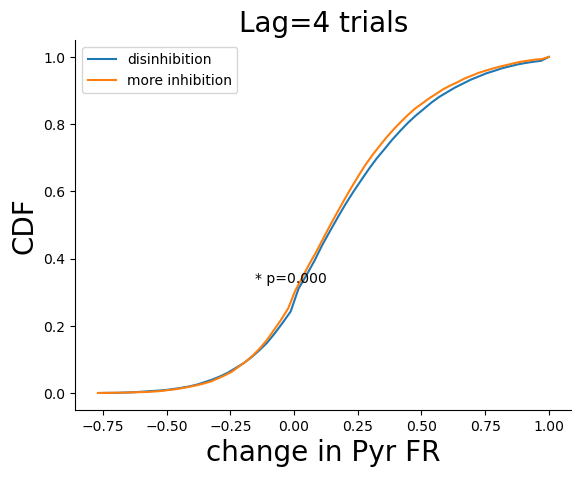

In [180]:
pyr_up_threh = 0.2
inh_thresh=0.
# xlim_l = [[0.4,0.6],[0.25,0.5],[0.25,0.5],[0.25,0.5]]
for jj,kk in enumerate(range(1,5)):
    ma=(consec_trial_fr_diff_all['pyr_1'] > pyr_up_threh) & (consec_trial_fr_diff_all['inh'] < inh_thresh)
    xx=consec_trial_fr_diff_all.loc[ma][f'pyr_{kk}']
    ma=(consec_trial_fr_diff_all['pyr_1'] > pyr_up_threh) & (consec_trial_fr_diff_all['inh'] > -inh_thresh)
    yy=consec_trial_fr_diff_all.loc[ma][f'pyr_{kk}']

    fig,ax=ph.plot_cdf_and_ks_test(xx,yy,label1='disinhibition',label2='more inhibition',xlabel='change in Pyr FR',title=f'Lag={kk} trials')
#     ax.set_xlim(xlim_l[jj])
    fig.savefig(os.path.join(figdir,f'cdf_change_in_pyr_lag_{kk}_disinhibition_vs_not_pyr_up_thresh_{pyr_up_threh:.0e}.svg'),bbox_inches='tight')
    fig.savefig(os.path.join(figdir,f'cdf_change_in_pyr_lag_{kk}_disinhibition_vs_not_pyr_up_thresh_{pyr_up_threh:.0e}.png'),bbox_inches='tight')
    
    